In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

# Fetch data from DB

In [2]:
from data import get_enhanced_at_bats
from datetime import datetime

enhanced_at_bats = get_enhanced_at_bats(from_date = datetime(2015, 1, 1))
enhanced_at_bats

events  \
game_date  game_pk home  team opponent at_bat batter pitcher              
2015-04-05 413661  False STL  CHC      1      572761 452657   field_out   
                                       2      518792 452657      double   
                                       3      407812 452657      single   
                                       4      425509 452657   strikeout   
                                       5      571431 452657   strikeout   
...                                                                 ...   
2023-08-28 716823  True  SF   CIN      58     672275 650960   field_out   
                                       59     657557 650960   strikeout   
                                       65     592626 650960   field_out   
                                       66     669477 650960   field_out   
                                       67     682641 650960   strikeout   

                                                                rhb    rhp  \
game_date  game_pk home  team opponent at_bat batter pitcher                 
2015-04-05 413661  False STL  CHC      1      572761 452657   False  False   
                                       2      518792 452657   False  False   
                                       3      407812 452657    True  False   
                                       4      425509 452657    True  False   
                                       5      571431 452657   False  False   
...                                                             ...    ...   
2023-08-28 716823  True  SF   CIN      58     672275 650960   False   True   
                                       59     657557 650960    True   True   
                                       65     592626 650960   False   True   
                                       66     669477 650960    True   True   
                                       67     682641 650960    True   True   

                                                                xBA  opp_sp  \
game_date  game_pk home  team opponent at_bat batter pitcher                  
2015-04-05 413661  False STL  CHC      1      572761 452657     NaN  452657   
                                       2      518792 452657     NaN  452657   
                                       3      407812 452657     NaN  452657   
                                       4      425509 452657     NaN  452657   
                                       5      571431 452657     NaN  452657   
...                                                             ...     ...   
2023-08-28 716823  True  SF   CIN      58     672275 650960   0.014  671096   
                                       59     657557 650960     NaN  671096   
                                       65     592626 650960   0.017  671096   
                                       66     669477 650960   0.154  671096   
                                       67     682641 650960     NaN  671096   

                                                             bats  hp_to_1b  \
game_date  game_pk home  team opponent at_bat batter pitcher                  
2015-04-05 413661  False STL  CHC      1      572761 452657     L      4.28   
                                       2      518792 452657     L      4.36   
                                       3      407812 452657     R      4.54   
                                       4      425509 452657     R      4.75   
                                       5      571431 452657     L      4.71   
...                                                           ...       ...   
2023-08-28 716823  True  SF   CIN      58     672275 650960     S      4.75   
                                       59     657557 650960     R      4.63   
                                       65     592626 650960     L      4.52   
                                       66     669477 650960     R      4.49   
                                       67     682641 650960     R      4.42   

                  

# Initialize classifier

In [3]:
from model import BTSBatterClassifier
from sklearn.linear_model import LogisticRegressionCV

log_reg = BTSBatterClassifier(LogisticRegressionCV(cv = 10, random_state = 57), at_bats_df = enhanced_at_bats, pkl_name = 'log_reg')

# Batter per game and per PA aggregations

In [4]:
log_reg.batter_per_game_agg()

G_last_50G  HG%_last_50G  xHG%_last_50G  \
game_date  game_pk home  batter                                            
2015-04-05 413661  False 407812           0      0.000000       0.000000   
                         425509           0      0.000000       0.000000   
                         425794           0      0.000000       0.000000   
                         425877           0      0.000000       0.000000   
                         445055           0      0.000000       0.000000   
...                                     ...           ...            ...   
2023-08-28 716823  True  642731          50      0.680000       0.500000   
                         657557          50      0.540000       0.400000   
                         669477          50      0.440000       0.320000   
                         672275          50      0.680000       0.400000   
                         682641          47      0.659574       0.340426   

                                 PA/G_last_50G  BIP/G_last_50G  H/G_last_50G  \
game_date  game_pk home  batter                                                
2015-04-05 413661  False 407812       0.000000        0.000000      0.000000   
                         425509       0.000000        0.000000      0.000000   
                         425794       0.000000        0.000000      0.000000   
                         425877       0.000000        0.000000      0.000000   
                         445055       0.000000        0.000000      0.000000   
...                                        ...             ...           ...   
2023-08-28 716823  True  642731       4.560000        3.060000      1.040000   
                         657557       3.880000        2.500000      0.720000   
                         669477       3.760000        2.580000      0.580000   
                         672275       4.060000        2.680000      0.820000   
                         682641       3.744681        3.042553      0.851064   

                                 xH/G_last_50G  
game_date  game_pk home  batter                 
2015-04-05 413661  False 407812       0.000000  
                         425509       0.000000  
                         425794       0.000000  
                         425877       0.000000  
                         445055       0.000000  
...                                        ...  
2023-08-28 716823  True  642731       0.976680  
                         657557       0.805060  
                         669477       0.709940  
                         672275       0.894360  
                         682641       0.909936  

[339376 rows x 7 columns]

In [5]:
log_reg.batter_per_pa_agg()

PA_last_200PA  BIP/PA_last_200PA  H/PA_last_200PA  \
game_date  game_pk batter                                                      
2015-04-05 413661  407812              0           0.000000         0.000000   
                   424325              0           0.000000         0.000000   
                   425509              0           0.000000         0.000000   
                   425794              0           0.000000         0.000000   
                   425877              0           0.000000         0.000000   
...                                  ...                ...              ...   
2023-08-28 716823  682641            191           0.795812         0.230366   
                   682829            200           0.575000         0.210000   
                   685133             39           0.435897         0.230769   
                   686759             41           0.585366         0.170732   
                   687952            141           0.595745         0.212766   

                           xH/PA_last_200PA  
game_date  game_pk batter                    
2015-04-05 413661  407812          0.000000  
                   424325          0.000000  
                   425509          0.000000  
                   425794          0.000000  
                   425877          0.000000  
...                                     ...  
2023-08-28 716823  682641          0.237372  
                   682829          0.217930  
                   685133          0.208487  
                   686759          0.163268  
                   687952          0.236199  

[414277 rows x 4 columns]

# Pitcher and bullpen per BF aggregations

In [6]:
log_reg.pitcher_per_bf_agg()

BF_last_200BF  K%_last_200BF  BB%_last_200BF  \
game_date  game_pk pitcher                                                 
2015-04-05 413661  425794               0       0.000000        0.000000   
                   435400               0       0.000000        0.000000   
                   444468               0       0.000000        0.000000   
                   452657               0       0.000000        0.000000   
                   457435               0       0.000000        0.000000   
...                                   ...            ...             ...   
2023-08-28 716823  650960              93       0.193548        0.139785   
                   666808             200       0.340000        0.115000   
                   671096             200       0.250000        0.090000   
                   676254             198       0.282828        0.085859   
                   690986              16       0.312500        0.125000   

                            H/PA_last_200BF  xH/PA_last_200BF  
game_date  game_pk pitcher                                     
2015-04-05 413661  425794          0.000000          0.000000  
                   435400          0.000000          0.000000  
                   444468          0.000000          0.000000  
                   452657          0.000000          0.000000  
                   457435          0.000000          0.000000  
...                                     ...               ...  
2023-08-28 716823  650960          0.193548          0.176366  
                   666808          0.175000          0.168410  
                   671096          0.230000          0.225600  
                   676254          0.217172          0.178520  
                   690986          0.312500          0.229875  

[170182 rows x 5 columns]

In [7]:
log_reg.bullpen_per_bf_agg()

BF_last_200BF  K%_last_200BF  BB%_last_200BF  \
game_date  game_pk opponent                                                 
2015-04-05 413661  CHC                   0          0.000           0.000   
                   STL                   0          0.000           0.000   
2015-04-06 413649  LAA                   0          0.000           0.000   
                   SEA                   0          0.000           0.000   
           413650  ATL                   0          0.000           0.000   
...                                    ...            ...             ...   
2023-08-28 716817  PHI                 200          0.265           0.090   
           716818  NYM                 200          0.260           0.110   
                   TEX                 200          0.200           0.100   
           716823  CIN                 200          0.230           0.135   
                   SF                  200          0.240           0.110   

                             H/PA_last_200BF  xH/PA_last_200BF  
game_date  game_pk opponent                                     
2015-04-05 413661  CHC                 0.000          0.000000  
                   STL                 0.000          0.000000  
2015-04-06 413649  LAA                 0.000          0.000000  
                   SEA                 0.000          0.000000  
           413650  ATL                 0.000          0.000000  
...                                      ...               ...  
2023-08-28 716817  PHI                 0.210          0.206505  
           716818  NYM                 0.165          0.175555  
                   TEX                 0.225          0.189575  
           716823  CIN                 0.150          0.156545  
                   SF                  0.220          0.227605  

[39275 rows x 5 columns]

# Fit classifier

In [8]:
log_reg.fit_model(scale_features = True, perform_pca = True)

Initial 35 features: hp_to_1b, HG%_last_50G, xHG%_last_50G, PA/G_last_50G, BIP/G_last_50G, H/G_last_50G, xH/G_last_50G, HG%_last_50G_home_away, xHG%_last_50G_home_away, PA/G_last_50G_home_away, BIP/G_last_50G_home_away, H/G_last_50G_home_away, xH/G_last_50G_home_away, BIP/PA_last_200PA, H/PA_last_200PA, xH/PA_last_200PA, BIP/PA_last_200PA_vs_hp, H/PA_last_200PA_vs_hp, xH/PA_last_200PA_vs_hp, K%_last_200BF, BB%_last_200BF, H/PA_last_200BF, xH/PA_last_200BF, K%_last_200BF_vs_hb, BB%_last_200BF_vs_hb, H/PA_last_200BF_vs_hb, xH/PA_last_200BF_vs_hb, K%_last_200BF_bullpen, BB%_last_200BF_bullpen, H/PA_last_200BF_bullpen, xH/PA_last_200BF_bullpen, PA_last_200PA_vs_opp_sp, BIP/PA_last_200PA_vs_opp_sp, H/PA_last_200PA_vs_opp_sp, xH/PA_last_200PA_vs_opp_sp
PCA: # of features reduced from 35 to 28
Score on training data: 0.647
Score on testing data: 0.649


# Simulate results on test data

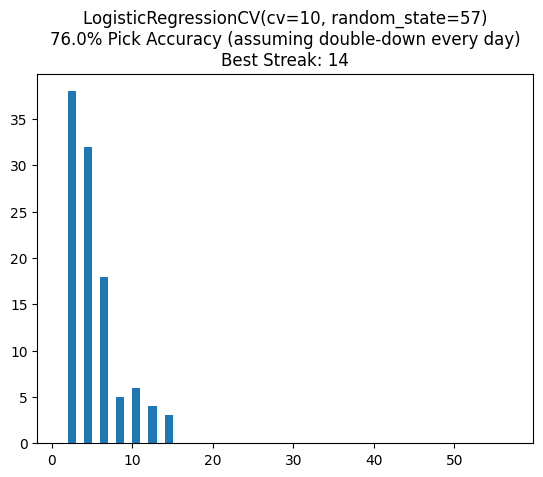

In [9]:
log_reg.simulate_results()

# Get predictions for today

In [10]:
todays_predictions = log_reg.todays_predictions()
todays_predictions

GET https://www.mlb.com/apps/beat-the-streak/game/json/units.json (200) 0.2s
GET https://www.mlb.com/apps/beat-the-streak/game/json/squads.json (200) 0.18s
GET https://www.mlb.com/apps/beat-the-streak/game/json/players.json (200) 0.14s


,,,,,,lineup,name,bats,opp_sp,opp_sp_name,opp_sp_throws,hp_to_1b,H%
game_date,game_pk,home,team,opponent,batter,,,,,,,,
2023-08-29 20:35:00,716791,False,ATL,COL,660670,0,Ronald Acuña Jr.,R,663567,Peter Lambert,R,4.33,0.781559
2023-08-29 18:35:00,716807,True,MIA,TB,650333,0,Luis Arraez,L,650644,Aaron Civale,R,4.56,0.757803
2023-08-29 19:05:00,716802,True,BOS,HOU,807799,0,Masataka Yoshida,L,641585,J.P. France,R,4.36,0.745121
2023-08-29 22:05:00,716792,True,LAD,AZ,605141,0,Mookie Betts,R,518876,Merrill Kelly,R,4.48,0.738570
2023-08-29 19:00:00,716800,True,BAL,CWS,668939,0,Adley Rutschman,S,669947,Jesse Scholtens,R,4.41,0.738437
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-29 20:35:00,716791,True,COL,ATL,642851,0,Austin Wynns,R,450203,Charlie Morton,R,4.99,0.506119
2023-08-29 22:05:00,716792,False,AZ,LAD,645444,0,Jose Herrera,S,477132,Clayton Kershaw,L,4.61,0.505215
2023-08-29 20:35:00,716791,True,COL,ATL,686668,0,Brenton Doyle,R,450203,Charlie Morton,R,4.24,0.499958
